# Predicting Heart Disease with the MIT Arrythmia Dataset

Before anything else, please hit "not trusted" on this notebook and trust this notebook, the below will install common packages not expected to have malicious code.

In [4]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/del/Courses/interviews/mindx/hbenv/bin/python3.9 -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data and Initial EDA

The data consists of about 21000 examples of heartbeats recorded over a 125 hz sampling interval. As there are 187 features, the duration is about one and a half seconds. 

In [6]:
train_data = pd.read_csv("./heartbeat/mitbih_test.csv", header=None)
test_data = pd.read_csv("./heartbeat/mitbih_train.csv", header=None)


In [7]:
train_data.shape

(21892, 188)

In [8]:
train_df = pd.DataFrame(train_data)
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.797260,0.320548,0.043836,0.049315,0.065753,0.030137,0.008219,0.005479,0.010959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.927803,0.866359,0.299539,0.000000,0.231951,0.317972,0.274962,0.262673,0.270353,0.268817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Descriptive Stats

The Data has 188 columns, with the 188th column being a variable determining arythmia, with 5 classes: 

0. "Non Ectopic beats (Normal beats)",
1. "Supraventrical ectopic beats",
2. "Ventricular ectopic beats",
3. "Fusion beats",
4. "Unknown beats"


The train and test data are heavily imbalanced as you can see from the counts below. 

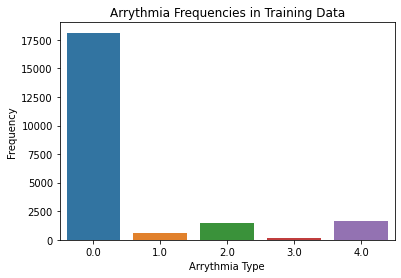

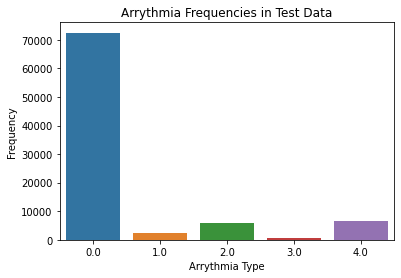

In [9]:
def freq_plot(df, title, xlab, ylab):
    freqs = df[df.columns[-1]].value_counts()
    freq_plot = sns.barplot(x=freqs.index, y=freqs)
    freq_plot.set(title = title, xlabel=xlab, ylabel=ylab)
    plt.show()
    
freq_plot(train_data,"Arrythmia Frequencies in Training Data", "Arrythmia Type", "Frequency")
freq_plot(test_data, "Arrythmia Frequencies in Test Data", "Arrythmia Type", "Frequency")


Fortunately, there are no missing/null values in train or test. 

In [10]:
train_data.isnull().sum().sum()

0

Let's check out the actual distributions of values among the features:


In [19]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,...,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,...,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432777,0.167630,0.147642,0.158111,0.144068,0.144509,0.150422,0.149029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912319,0.583991,0.347092,0.259211,0.287356,0.298453,0.294563,0.289907,0.282956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


# Exploratory Data Analysis



Most of the features have a correlation greater than .25, but none of them have a correlation greater than .5. It's probably best to consider all features here. 

In [11]:
(abs(train_data.corr().mean().values) > .25).sum()

167

In [12]:
(abs(train_data.corr().mean().values) > .5).sum()

0

Let's get a look at the actual signals in the dataset, here's a random one that's classified as normal, followed by the overall signal from just the normal heartbeats (even this signal is highly noisy). 

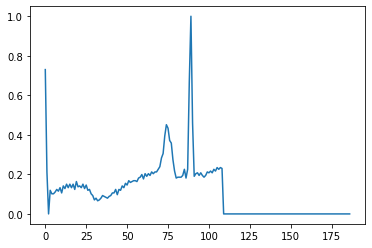

In [13]:
plt.plot(train_data.iloc[2,:-1])
plt.show()

In [14]:
mask = train_data[187].isin([0])

In [15]:
train_data_T = train_data[mask].transpose()


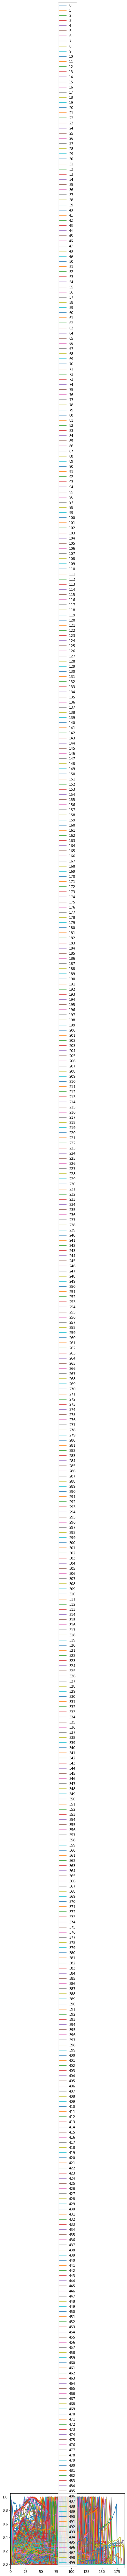

In [17]:
train_data_T.iloc[:,:500].plot()